# First visualization
## Which song has higher chance of bigger hit based on the weeks on rank (track)

Using multiple linear regression, find the relatiship between each features and the track

In [1]:
# import necessary library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline
plt.style.use('seaborn')

In [2]:
# open csv file that will be used
df_00 = pd.read_csv('data/df_00.csv')
df_10 = pd.read_csv('data/df_10.csv')

Simple data statistic and visualization

In [3]:
df_10.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,77,50,20,2016-07-23,2016-02-02,"Canada,Pop",NaN
1,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,66,50,19,2016-07-16,2016-02-02,"Canada,Pop",NaN
2,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,58,50,18,2016-07-09,2016-02-02,"Canada,Pop",NaN
3,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,52,50,17,2016-07-02,2016-02-02,"Canada,Pop",NaN
4,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,51,50,16,2016-06-25,2016-02-02,"Canada,Pop",NaN


In [4]:
df_10.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
count,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000,52514.000000
mean,0.635331,0.681912,5.384355,-5.869377,0.677534,0.095635,0.162999,0.014599,0.177758,0.488973,122.654291,223875.016624,3.985109,39.104449,10.024851,0.948928,48.985832,32.693091,12.695148
std,0.139806,0.168585,3.598121,2.286930,0.467425,0.095837,0.208790,0.097527,0.138516,0.215521,28.686177,43680.182897,0.225080,17.666684,2.443693,0.220147,28.785245,27.965312,10.428529
min,0.121000,0.021900,0.000000,-32.248000,0.000000,0.022500,0.000006,0.000000,0.016700,0.022400,48.718000,59387.000000,1.000000,9.391840,3.000000,0.000000,1.000000,0.000000,0.000000
25%,0.548000,0.571000,2.000000,-6.890000,0.000000,0.037200,0.020300,0.000000,0.095300,0.329000,99.836000,199320.000000,4.000000,27.513340,8.000000,1.000000,24.000000,6.000000,5.000000
50%,0.642000,0.705000,6.000000,-5.517500,1.000000,0.053300,0.073200,0.000000,0.121000,0.482000,122.050000,219080.000000,4.000000,34.722060,10.000000,1.000000,48.000000,27.000000,11.000000
75%,0.734000,0.810000,8.000000,-4.402000,1.000000,0.109000,0.221000,0.000013,0.215000,0.648000,141.514000,240166.000000,4.000000,45.763930,11.000000,1.000000,74.000000,55.000000,18.000000
max,0.980000,0.991000,11.000000,-0.716000,1.000000,0.733000,0.992000,0.973000,0.979000,0.976000,208.067000,726947.000000,5.000000,213.154990,24.000000,1.000000,100.000000,100.000000,87.000000


In [5]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             52514 non-null  object 
 1   artist            52514 non-null  object 
 2   danceability      52514 non-null  float64
 3   energy            52514 non-null  float64
 4   key               52514 non-null  int64  
 5   loudness          52514 non-null  float64
 6   mode              52514 non-null  int64  
 7   speechiness       52514 non-null  float64
 8   acousticness      52514 non-null  float64
 9   instrumentalness  52514 non-null  float64
 10  liveness          52514 non-null  float64
 11  valence           52514 non-null  float64
 12  tempo             52514 non-null  float64
 13  duration_ms       52514 non-null  int64  
 14  time_signature    52514 non-null  int64  
 15  chorus_hit        52514 non-null  float64
 16  sections          52514 non-null  int64 

visual and statistics from 2000s to 2010

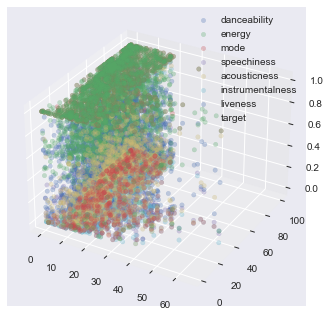

In [6]:
df_00_samp = df_00.sample(1500)

labels = ["danceability", "energy", "mode", "speechiness", 
          "acousticness", "instrumentalness", "liveness", "target"]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for l in labels:
    ax.scatter(df_00_samp['Weeks.on.chart'], df_00_samp['Weekly.rank'], 
               df_00_samp[l], label = l, alpha = 0.3)


ax.legend(loc = "best")
plt.show()

linear regression using statsmodels.OLS()

In [7]:
X0, y0 = df_00.select_dtypes(exclude=['object']), df_00['Weeks.on.chart']

In [8]:
model01 = sm.OLS(y0, X0).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Weeks.on.chart   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.093e+31
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        09:17:59   Log-Likelihood:                      1.4293e+06
No. Observations:               50650   AIC:                                 -2.859e+06
Df Residuals:                   50631   BIC:                                 -2.858e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability      5.204e-16   5.19e-15      0.100      0.920   -9.65e-15    1.07e-14
energy           -2.937e-14    5.4e-15     -5.434      0.000      -4e-14   -1.88e-14
key                2.28e-15   1.71e-16     13.350      0.000    1.95e-15    2.62e-15
loudness          8.084e-16   3.76e-16      2.148      0.032    7.08e-17    1.55e-15
mode              1.232e-14   1.33e-15      9.292      0.000    9.72e-15    1.49e-14
speechiness       8.155e-14   6.65e-15     12.266      0.000    6.85e-14    9.46e-14
acousticness     -5.704e-14   3.71e-15    -15.394      0.000   -6.43e-14   -4.98e-14
instrumentalness  5.464e-14   8.34e-15      6.553      0.000    3.83e-14     7.1e-14
liveness          1.364e-14   4.61e-15      2.960      0.003    4.61e-15    2.27e-14
valence          -2.709e-14   3.47e-15     -7.810      0.000   -3.39e-14   -2.03e-14
tempo            -1.775e-16    2.1e-17     -8.444      0.000   -2.19e-16   -1.36e-16
duration_ms      -3.981e-19    1.8e-20    -22.152      0.000   -4.33e-19   -3.63e-19
time_signature   -1.663e-14   1.81e-15     -9.212      0.000   -2.02e-14   -1.31e-14
chorus_hit        2.881e-16   3.66e-17      7.871      0.000    2.16e-16     3.6e-16
sections         -5.803e-16   3.49e-16     -1.664      0.096   -1.26e-15    1.03e-16
target            5.579e-14   3.45e-15     16.164      0.000     4.9e-14    6.26e-14
Weekly.rank        3.33e-16   2.81e-17     11.837      0.000    2.78e-16    3.88e-16
Peak.position     2.759e-17   3.04e-17      0.909      0.363   -3.19e-17    8.71e-17
Weeks.on.chart       1.0000   7.46e-17   1.34e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    18935.134   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264044.096
Skew:                           1.412   Prob(JB):                         0.00
Kurtosis:                      13.823   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared is 1 which is too perfect to be used. Use this as reference to find the better target

In [9]:
# compaired with 2010s, danceability is noticeable, so use danceability as a target
# since weeks on chart is a time, and it can be considered as categorical columns


X0, y0 = df_00.select_dtypes(exclude=['object']).drop(['danceability'], axis = 1), df_00['danceability']

model01 = sm.OLS(y0, X0).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           danceability   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          8.489e+04
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        09:17:59   Log-Likelihood:                          37649.
No. Observations:               50650   AIC:                                 -7.526e+04
Df Residuals:                   50632   BIC:                                 -7.510e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy              -0.1797      0.005    -39.406      0.000      -0.189      -0.171
key                  0.0003      0.000      1.966      0.049    8.71e-07       0.001
loudness            -0.0043      0.000    -13.447      0.000      -0.005      -0.004
mode                -0.0228      0.001    -20.110      0.000      -0.025      -0.021
speechiness          0.1933      0.006     34.340      0.000       0.182       0.204
acousticness        -0.0780      0.003    -24.730      0.000      -0.084      -0.072
instrumentalness     0.0747      0.007     10.466      0.000       0.061       0.089
liveness            -0.0875      0.004    -22.271      0.000      -0.095      -0.080
valence              0.3375      0.003    131.618      0.000       0.332       0.343
tempo               -0.0009   1.75e-05    -53.045      0.000      -0.001      -0.001
duration_ms       2.334e-08   1.54e-08      1.516      0.129   -6.83e-09    5.35e-08
time_signature       0.1213      0.001     83.682      0.000       0.118       0.124
chorus_hit           0.0003   3.13e-05     10.825      0.000       0.000       0.000
sections             0.0076      0.000     25.551      0.000       0.007       0.008
target               0.1139      0.003     39.098      0.000       0.108       0.120
Weekly.rank         -0.0001   2.41e-05     -5.851      0.000      -0.000   -9.37e-05
Peak.position       -0.0002    2.6e-05     -8.188      0.000      -0.000      -0.000
Weeks.on.chart       0.0001   6.39e-05      1.784      0.074   -1.12e-05       0.000
==============================================================================
Omnibus:                      579.800   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.163
Skew:                          -0.143   Prob(JB):                    8.90e-181
Kurtosis:                       3.558   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# to make it easier to compare with 2010, create model with energy


X0e, y0e = df_00.select_dtypes(exclude=['object']).drop(['energy'], axis = 1), df_00['energy']

model01e = sm.OLS(y0e, X0e).fit()
model01e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 energy   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          1.192e+05
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        09:17:59   Log-Likelihood:                          39718.
No. Observations:               50650   AIC:                                 -7.940e+04
Df Residuals:                   50632   BIC:                                 -7.924e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability        -0.1656      0.004    -39.406      0.000      -0.174      -0.157
key                  0.0028      0.000     19.886      0.000       0.003       0.003
loudness             0.0357      0.000    134.587      0.000       0.035       0.036
mode                 0.0061      0.001      5.559      0.000       0.004       0.008
speechiness          0.0223      0.005      4.074      0.000       0.012       0.033
acousticness        -0.2409      0.003    -84.437      0.000      -0.246      -0.235
instrumentalness     0.1511      0.007     22.145      0.000       0.138       0.164
liveness             0.1033      0.004     27.450      0.000       0.096       0.111
valence              0.2221      0.003     83.024      0.000       0.217       0.227
tempo                0.0007    1.7e-05     38.545      0.000       0.001       0.001
duration_ms       3.207e-07   1.47e-08     21.804      0.000    2.92e-07     3.5e-07
time_signature       0.1773      0.001    140.886      0.000       0.175       0.180
chorus_hit          -0.0001   3.01e-05     -4.659      0.000      -0.000   -8.12e-05
sections            -0.0032      0.000    -11.203      0.000      -0.004      -0.003
target               0.0373      0.003     13.164      0.000       0.032       0.043
Weekly.rank          0.0003   2.31e-05     10.873      0.000       0.000       0.000
Peak.position        0.0002   2.49e-05      8.727      0.000       0.000       0.000
Weeks.on.chart       0.0011   6.11e-05     18.407      0.000       0.001       0.001
==============================================================================
Omnibus:                      994.737   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2077.553
Skew:                           0.068   Prob(JB):                         0.00
Kurtosis:                       3.983   Cond. No.                     3.44e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

more resonable coef with R squared. Valence, time_signature, and target is noticeable.

In [11]:
# print table for powerpoint (reports) where target = danceability

result_00 = { 'features' : ['valence', 'time signature', 'target', 'instrumentalness'], 
             'coef' : [0.3375, 0.1213, 0.1139, 0.0747] }
df_result_00 = pd.DataFrame(result_00)
print('2000 to 2009')
print(f'R square: {0.968} \n')
print(df_result_00.to_string(index = False))

# print(df_result_00.head())

2000 to 2009
R square: 0.968 

         features    coef
          valence  0.3375
   time signature  0.1213
           target  0.1139
 instrumentalness  0.0747


In [12]:
# print table for powerpoint (reports) where target = energy

result_00 = { 'features' : ['valence', 'time signature', 'target', 'instrumentalness'], 
             'coef' : [0.2221, 0.1773, 0.0373, 0.1511] }
df_result_00 = pd.DataFrame(result_00)
print('2000 to 2009')
print(f'R square: {0.977} \n')
print(df_result_00.to_string(index = False))

# print(df_result_00.head())

2000 to 2009
R square: 0.977 

         features    coef
          valence  0.2221
   time signature  0.1773
           target  0.0373
 instrumentalness  0.1511


repeate with Intercept

In [13]:
predictors = sm.add_constant(X0)
predictors

,const,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
0,1.0,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,95,65,17
1,1.0,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,85,65,16
2,1.0,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,79,65,15
3,1.0,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,83,65,14
4,1.0,0.471,4,-7.270,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,80,65,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50645,1.0,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,76,70,5
50646,1.0,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,70,70,4
50647,1.0,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,76,76,3
50648,1.0,0.740,0,-5.566,0,0.0490,0.194,0.0,0.076,0.675,170.054,217160,4,24.95471,13,1,79,79,2


In [14]:
model02 = sm.OLS(y0, predictors).fit()
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     2259.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:17:59   Log-Likelihood:                 39506.
No. Observations:               50650   AIC:                        -7.897e+04
Df Residuals:                   50631   BIC:                        -7.881e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6566      0.011     62.057      0.000       0.636       0.677
energy              -0.2897      0.005    -61.126      0.000      -0.299      -0.280
key                 -0.0004      0.000     -2.693      0.007      -0.001      -0.000
loudness             0.0031      0.000      9.353      0.000       0.002       0.004
mode                -0.0284      0.001    -25.984      0.000      -0.031      -0.026
speechiness          0.1970      0.005     36.291      0.000       0.186       0.208
acousticness        -0.1146      0.003    -36.999      0.000      -0.121      -0.109
instrumentalness     0.0841      0.007     12.220      0.000       0.071       0.098
liveness            -0.0864      0.004    -22.814      0.000      -0.094      -0.079
valence              0.3324      0.002    134.378      0.000       0.328       0.337
tempo               -0.0012   1.74e-05    -68.049      0.000      -0.001      -0.001
duration_ms      -1.295e-07    1.5e-08     -8.613      0.000   -1.59e-07      -1e-07
time_signature       0.0290      0.002     14.207      0.000       0.025       0.033
chorus_hit           0.0001   3.04e-05      4.691      0.000    8.29e-05       0.000
sections             0.0064      0.000     22.229      0.000       0.006       0.007
target               0.0565      0.003     19.105      0.000       0.051       0.062
Weekly.rank         -0.0002   2.33e-05     -9.638      0.000      -0.000      -0.000
Peak.position       -0.0002   2.51e-05     -9.591      0.000      -0.000      -0.000
Weeks.on.chart      -0.0003   6.19e-05     -4.365      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      433.822   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.771
Skew:                          -0.124   Prob(JB):                    3.84e-128
Kurtosis:                       3.466   Cond. No.                     5.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared is now 0.445, compare to 0.96, it is getting worse. It has a low corrleation.

standard scaling

In [15]:
standardScale = (X0-np.mean(X0)) / np.std(X0)
standardScale.dropna(axis='columns', inplace = True)

In [16]:
X03 = sm.add_constant(standardScale)
model03 = sm.OLS(y0, X03).fit()
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     2259.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:18:00   Log-Likelihood:                 39506.
No. Observations:               50650   AIC:                        -7.897e+04
Df Residuals:                   50631   BIC:                        -7.881e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6250      0.000   1267.874      0.000       0.624       0.626
energy              -0.0480      0.001    -61.126      0.000      -0.050      -0.046
key                 -0.0013      0.000     -2.693      0.007      -0.002      -0.000
loudness             0.0065      0.001      9.353      0.000       0.005       0.008
mode                -0.0133      0.001    -25.984      0.000      -0.014      -0.012
speechiness          0.0190      0.001     36.291      0.000       0.018       0.020
acousticness        -0.0216      0.001    -36.999      0.000      -0.023      -0.020
instrumentalness     0.0064      0.001     12.220      0.000       0.005       0.007
liveness            -0.0116      0.001    -22.814      0.000      -0.013      -0.011
valence              0.0749      0.001    134.378      0.000       0.074       0.076
tempo               -0.0349      0.001    -68.049      0.000      -0.036      -0.034
duration_ms         -0.0060      0.001     -8.613      0.000      -0.007      -0.005
time_signature       0.0071      0.000     14.207      0.000       0.006       0.008
chorus_hit           0.0026      0.001      4.691      0.000       0.001       0.004
sections             0.0158      0.001     22.229      0.000       0.014       0.017
target               0.0099      0.001     19.105      0.000       0.009       0.011
Weekly.rank         -0.0065      0.001     -9.638      0.000      -0.008      -0.005
Peak.position       -0.0066      0.001     -9.591      0.000      -0.008      -0.005
Weeks.on.chart      -0.0024      0.001     -4.365      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      433.822   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.771
Skew:                          -0.124   Prob(JB):                    3.84e-128
Kurtosis:                       3.466   Cond. No.                         3.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared is not 0.445, it is not as good as before standard scaling. It has a low correlation

 # --------------------------------------------------------------------------------
 <br>
 
 2010 to 2019

visual and statistics of 2010s to 2020

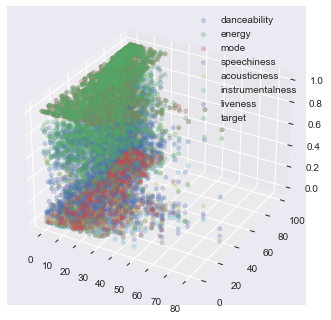

In [17]:
df_10_samp = df_10.sample(1500)

labels = ["danceability", "energy", "mode", "speechiness", 
          "acousticness", "instrumentalness", "liveness", "target"]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for l in labels:
    ax.scatter(df_10_samp['Weeks.on.chart'], df_10_samp['Weekly.rank'], 
               df_10_samp[l], label = l, alpha = 0.3)


ax.legend(loc = "best")
plt.show()

linear regression using statsmodels.OLS()

In [18]:
X1, y = df_10.select_dtypes(exclude=['object']), df_10['Weeks.on.chart']

In [19]:
model1 = sm.OLS(y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Weeks.on.chart   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.490e+32
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        09:18:00   Log-Likelihood:                      1.5642e+06
No. Observations:               52514   AIC:                                 -3.128e+06
Df Residuals:                   52495   BIC:                                 -3.128e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability      2.331e-14   9.87e-16     23.617      0.000    2.14e-14    2.52e-14
energy            1.783e-14    1.2e-15     14.849      0.000    1.55e-14    2.02e-14
key               2.645e-16   3.42e-17      7.738      0.000    1.98e-16    3.32e-16
loudness         -9.442e-16   7.95e-17    -11.872      0.000    -1.1e-15   -7.88e-16
mode              -1.54e-15   2.69e-16     -5.726      0.000   -2.07e-15   -1.01e-15
speechiness      -3.247e-15   1.37e-15     -2.375      0.018   -5.93e-15   -5.68e-16
acousticness       2.04e-14   6.93e-16     29.430      0.000     1.9e-14    2.18e-14
instrumentalness -1.445e-13   1.45e-15    -99.677      0.000   -1.47e-13   -1.42e-13
liveness          1.898e-14   9.11e-16     20.849      0.000    1.72e-14    2.08e-14
valence          -8.677e-15   6.83e-16    -12.700      0.000      -1e-14   -7.34e-15
tempo             3.239e-16   4.37e-18     74.124      0.000    3.15e-16    3.32e-16
duration_ms      -5.326e-20   3.92e-21    -13.573      0.000   -6.09e-20   -4.56e-20
time_signature    1.616e-14   3.78e-16     42.769      0.000    1.54e-14    1.69e-14
chorus_hit       -1.479e-16   7.72e-18    -19.147      0.000   -1.63e-16   -1.33e-16
sections         -1.409e-15   7.08e-17    -19.901      0.000   -1.55e-15   -1.27e-15
target           -7.536e-14   6.04e-16   -124.858      0.000   -7.65e-14   -7.42e-14
Weekly.rank      -2.203e-16   5.93e-18    -37.155      0.000   -2.32e-16   -2.09e-16
Peak.position    -1.548e-16   6.15e-18    -25.191      0.000   -1.67e-16   -1.43e-16
Weeks.on.chart       1.0000    1.3e-17    7.7e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     4794.052   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34726.975
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                       6.983   Cond. No.                     2.81e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Similar to 2000s, R square is 1, use this as reference, and use danceability and energy as a target variable

In [20]:
X1, y = df_10.select_dtypes(exclude=['object']).drop(['energy'], axis = 1), df_10['energy']

model1 = sm.OLS(y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 energy   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          1.357e+05
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        09:18:00   Log-Likelihood:                          45425.
No. Observations:               52514   AIC:                                 -9.081e+04
Df Residuals:                   52496   BIC:                                 -9.065e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability        -0.1275      0.004    -35.970      0.000      -0.134      -0.121
key                  0.0010      0.000      8.434      0.000       0.001       0.001
loudness             0.0385      0.000    163.809      0.000       0.038       0.039
mode                 0.0041      0.001      4.206      0.000       0.002       0.006
speechiness         -0.0239      0.005     -4.807      0.000      -0.034      -0.014
acousticness        -0.1948      0.002    -82.120      0.000      -0.199      -0.190
instrumentalness     0.1507      0.005     28.822      0.000       0.140       0.161
liveness             0.1090      0.003     33.296      0.000       0.103       0.115
valence              0.2107      0.002     91.336      0.000       0.206       0.215
tempo                0.0006   1.57e-05     36.933      0.000       0.001       0.001
duration_ms       2.786e-07   1.42e-08     19.605      0.000    2.51e-07    3.06e-07
time_signature       0.1814      0.001    161.631      0.000       0.179       0.184
chorus_hit           0.0006    2.8e-05     19.915      0.000       0.001       0.001
sections            -0.0009      0.000     -3.458      0.001      -0.001      -0.000
target              -0.0051      0.002     -2.313      0.021      -0.009      -0.001
Weekly.rank          0.0003   2.15e-05     12.851      0.000       0.000       0.000
Peak.position        0.0001   2.23e-05      6.705      0.000       0.000       0.000
Weeks.on.chart       0.0004   4.72e-05      9.164      0.000       0.000       0.001
==============================================================================
Omnibus:                      771.359   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1458.127
Skew:                          -0.046   Prob(JB):                         0.00
Kurtosis:                       3.811   Cond. No.                     2.75e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X1d, yd = df_10.select_dtypes(exclude=['object']).drop(['danceability'], axis = 1), df_10['danceability']

model1 = sm.OLS(y, X1d).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 energy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.271e+28
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        09:18:01   Log-Likelihood:                      1.4489e+06
No. Observations:               52514   AIC:                                 -2.898e+06
Df Residuals:                   52496   BIC:                                 -2.898e+06
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy               1.0000   1.07e-14   9.39e+13      0.000       1.000       1.000
key               6.898e-17   3.07e-16      0.225      0.822   -5.33e-16    6.71e-16
loudness         -1.051e-16   7.14e-16     -0.147      0.883    -1.5e-15    1.29e-15
mode              7.079e-16   2.41e-15      0.293      0.769   -4.02e-15    5.44e-15
speechiness      -3.012e-16   1.21e-14     -0.025      0.980   -2.39e-14    2.33e-14
acousticness      4.755e-16   6.15e-15      0.077      0.938   -1.16e-14    1.25e-14
instrumentalness -3.198e-15    1.3e-14     -0.246      0.806   -2.87e-14    2.23e-14
liveness          1.444e-15   8.17e-15      0.177      0.860   -1.46e-14    1.75e-14
valence          -6.307e-16   5.84e-15     -0.108      0.914   -1.21e-14    1.08e-14
tempo             1.523e-17   3.89e-17      0.392      0.695   -6.09e-17    9.14e-17
duration_ms       1.157e-18   3.49e-20     33.130      0.000    1.09e-18    1.23e-18
time_signature    7.531e-16   3.09e-15      0.244      0.807    -5.3e-15    6.81e-15
chorus_hit        1.122e-17   6.91e-17      0.163      0.871   -1.24e-16    1.47e-16
sections          -8.44e-16   6.29e-16     -1.341      0.180   -2.08e-15     3.9e-16
target           -1.783e-15   5.35e-15     -0.333      0.739   -1.23e-14     8.7e-15
Weekly.rank       3.967e-17   5.32e-17      0.745      0.456   -6.47e-17    1.44e-16
Peak.position    -6.589e-17   5.52e-17     -1.195      0.232   -1.74e-16    4.22e-17
Weeks.on.chart   -1.401e-17   1.17e-16     -0.120      0.904   -2.43e-16    2.15e-16
==============================================================================
Omnibus:                    29685.902   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           574310.863
Skew:                          -2.325   Prob(JB):                         0.00
Kurtosis:                      18.520   Cond. No.                     2.78e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

more reasonable R squared. Valence, instrumentalness, and time_signature has stronger relationship with energy <br>
Speechiness and time signature has a relationship with danceability

In [22]:
# print table for powerpoint (reports) where target = energy

result_00 = { 'features' : ['valence', 'time signature', 'target', 'instrumentalness'], 
             'coef' : [0.2107, 0.1814, -0.0051, 0.1507] }
df_result_00 = pd.DataFrame(result_00)
print('2010 to 2019')
print(f'R square: {0.979} \n')
print(df_result_00.to_string(index = False))

# print(df_result_00.head())

2010 to 2019
R square: 0.979 

         features    coef
          valence  0.2107
   time signature  0.1814
           target -0.0051
 instrumentalness  0.1507


In [23]:
# print table for powerpoint (reports) where target = danceability

result_00 = { 'features' : ['valence', 'time signature', 'target', 'instrumentalness'], 
             'coef' : [0.2106, 0.1583, 0.0985, 0.0211] }
df_result_00 = pd.DataFrame(result_00)
print('2010 to 2019')
print(f'R square: {0.964} \n')
print(df_result_00.to_string(index = False))

# print(df_result_00.head())

2010 to 2019
R square: 0.964 

         features    coef
          valence  0.2106
   time signature  0.1583
           target  0.0985
 instrumentalness  0.0211


repeate with Intercep

In [24]:
predictors = sm.add_constant(X1)
predictors

,const,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
0,1.0,0.741,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,77,50,20
1,1.0,0.741,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,66,50,19
2,1.0,0.741,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,58,50,18
3,1.0,0.741,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,52,50,17
4,1.0,0.741,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,51,50,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52509,1.0,0.910,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,58,46,5
52510,1.0,0.910,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,74,46,4
52511,1.0,0.910,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,46,46,3
52512,1.0,0.910,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,53,53,2


In [25]:
model2 = sm.OLS(y, predictors).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     6220.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:18:01   Log-Likelihood:                 48962.
No. Observations:               52514   AIC:                        -9.789e+04
Df Residuals:                   52495   BIC:                        -9.772e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7730      0.009     87.007      0.000       0.756       0.790
danceability        -0.1832      0.003    -54.288      0.000      -0.190      -0.177
key              -9.473e-05      0.000     -0.811      0.417      -0.000       0.000
loudness             0.0414      0.000    186.347      0.000       0.041       0.042
mode                -0.0026      0.001     -2.812      0.005      -0.004      -0.001
speechiness          0.0123      0.005      2.644      0.008       0.003       0.021
acousticness        -0.2105      0.002    -94.647      0.000      -0.215      -0.206
instrumentalness     0.1357      0.005     27.738      0.000       0.126       0.145
liveness             0.0855      0.003     27.802      0.000       0.079       0.091
valence              0.1922      0.002     88.706      0.000       0.188       0.196
tempo                0.0002   1.52e-05     16.141      0.000       0.000       0.000
duration_ms       9.589e-08   1.34e-08      7.130      0.000    6.95e-08    1.22e-07
time_signature       0.0464      0.002     24.783      0.000       0.043       0.050
chorus_hit           0.0002   2.65e-05      7.659      0.000       0.000       0.000
sections            -0.0025      0.000    -10.165      0.000      -0.003      -0.002
target              -0.0385      0.002    -18.470      0.000      -0.043      -0.034
Weekly.rank          0.0001   2.02e-05      6.121      0.000     8.4e-05       0.000
Peak.position      9.81e-05   2.09e-05      4.698      0.000    5.72e-05       0.000
Weeks.on.chart    2.195e-05   4.44e-05      0.495      0.621    -6.5e-05       0.000
==============================================================================
Omnibus:                      321.733   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.710
Skew:                          -0.147   Prob(JB):                     1.73e-79
Kurtosis:                       3.282   Cond. No.                     4.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squareis 0.681 which is not as good as before

standard scaling

In [26]:
standardScale = (X1-np.mean(X1)) / np.std(X1)

In [27]:
standardScale.dropna(axis='columns', inplace = True)

In [28]:
X3 = sm.add_constant(standardScale)
model3 = sm.OLS(y, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     6220.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:18:01   Log-Likelihood:                 48962.
No. Observations:               52514   AIC:                        -9.789e+04
Df Residuals:                   52495   BIC:                        -9.772e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6819      0.000   1640.379      0.000       0.681       0.683
danceability        -0.0256      0.000    -54.288      0.000      -0.027      -0.025
key                 -0.0003      0.000     -0.811      0.417      -0.001       0.000
loudness             0.0948      0.001    186.347      0.000       0.094       0.096
mode                -0.0012      0.000     -2.812      0.005      -0.002      -0.000
speechiness          0.0012      0.000      2.644      0.008       0.000       0.002
acousticness        -0.0440      0.000    -94.647      0.000      -0.045      -0.043
instrumentalness     0.0132      0.000     27.738      0.000       0.012       0.014
liveness             0.0118      0.000     27.802      0.000       0.011       0.013
valence              0.0414      0.000     88.706      0.000       0.041       0.042
tempo                0.0070      0.000     16.141      0.000       0.006       0.008
duration_ms          0.0042      0.001      7.130      0.000       0.003       0.005
time_signature       0.0104      0.000     24.783      0.000       0.010       0.011
chorus_hit           0.0036      0.000      7.659      0.000       0.003       0.004
sections            -0.0060      0.001    -10.165      0.000      -0.007      -0.005
target              -0.0085      0.000    -18.470      0.000      -0.009      -0.008
Weekly.rank          0.0036      0.001      6.121      0.000       0.002       0.005
Peak.position        0.0027      0.001      4.698      0.000       0.002       0.004
Weeks.on.chart       0.0002      0.000      0.495      0.621      -0.001       0.001
==============================================================================
Omnibus:                      321.733   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.710
Skew:                          -0.147   Prob(JB):                     1.73e-79
Kurtosis:                       3.282   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R square is 0.681 which is not as good as before